In [2]:
from skimage import io,transform
import os

BASE_DIR = os.path.join('/work/george','DAVIS')
IMAGESETS = os.path.join('ImageSets','480p')


def read_label(labelFile,size) :
    maskFile = BASE_DIR + labelFile
    mask = io.imread(maskFile,as_grey=True)
        
    # Resize 
    mask = transform.resize(mask,[size,size])
        
    #io.imshow(mask)
        
    return mask

In [3]:
def diff(label_file1,label_file2,size):
    label1 = read_label(label_file1,size)
    label2 = read_label(label_file2,size)
    
    return label1 - label2

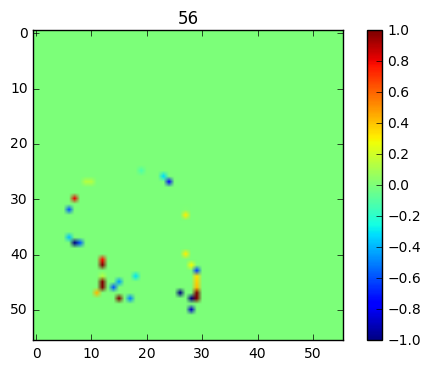

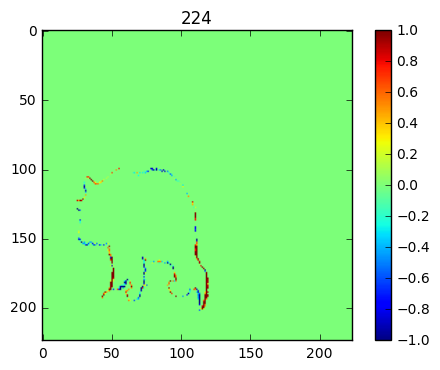

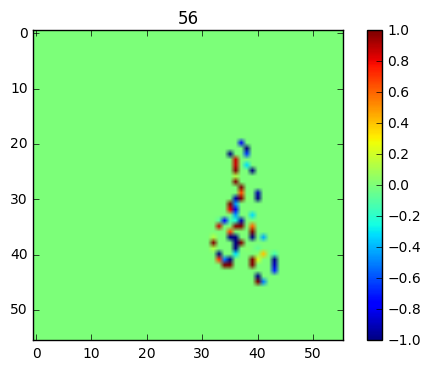

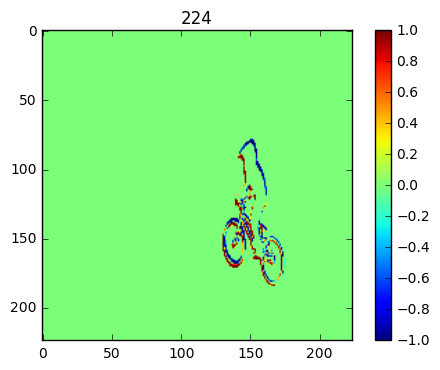

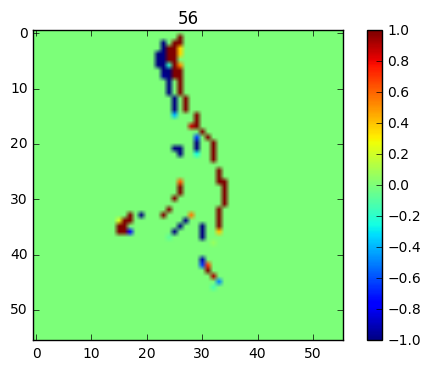

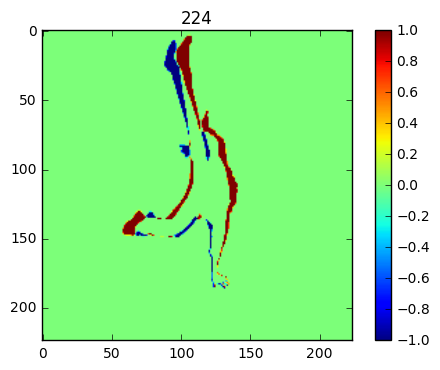

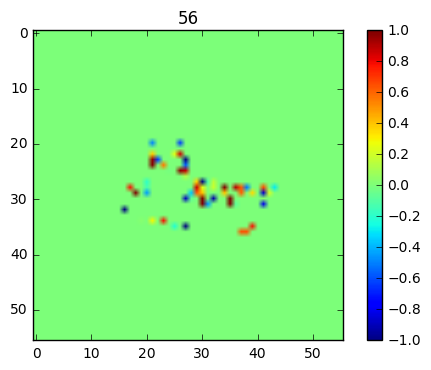

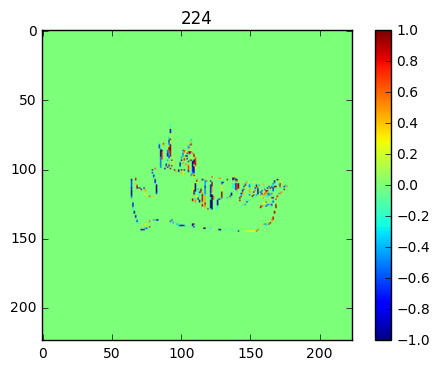

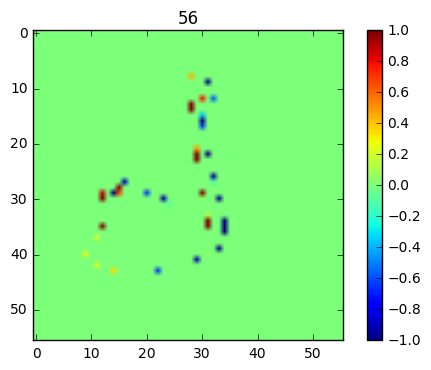

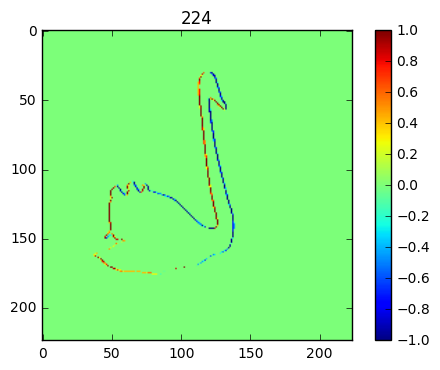

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

label_list = [['/Annotations/480p/bear/00002.png' ,'/Annotations/480p/bear/00003.png'],
['/Annotations/480p/bmx-bumps/00084.png' ,'/Annotations/480p/bmx-bumps/00085.png'],
           ['/Annotations/480p/breakdance-flare/00001.png', '/Annotations/480p/breakdance-flare/00002.png'],
           ['/Annotations/480p/boat/00006.png','/Annotations/480p/boat/00007.png' ],
           ['/Annotations/480p/blackswan/00005.png', '/Annotations/480p/blackswan/00006.png' ]]
for image_no in range(len(label_list)):
    diff_img_56 = diff(label_list[image_no][0],label_list[image_no][1],56)
    diff_img_224 = diff(label_list[image_no][0],label_list[image_no][1],224)

    plt.figure()
    plt.imshow(diff_img_56)
    plt.title("56")
    plt.colorbar()
    
    plt.figure()
    plt.imshow(diff_img_224)
    plt.title("224")
    plt.colorbar()

8.983286908077995


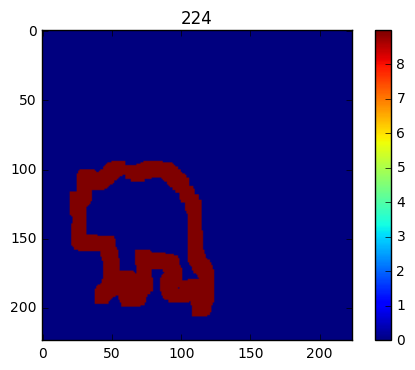

In [25]:
import matplotlib.pyplot as plt
import numpy as np
from skimage import morphology
%matplotlib inline

label_imgs = ['/Annotations/480p/bear/00002.png' ,'/Annotations/480p/bear/00003.png']
diff_img_224 = diff(label_imgs[0],label_imgs[1],224)
diff_img_224 = np.absolute(diff_img_224)
diff_img_224[diff_img_224>0] = 1
diff_img_224 = morphology.dilation(diff_img_224,np.ones([10,10]))
count = np.count_nonzero(diff_img_224)
zeros = np.where(diff_img_224==0)[0]
ones = np.where(diff_img_224==1)[0]
print(zeros.shape[0]/ones.shape[0])
factor = zeros.shape[0]/ones.shape[0]
diff_img_224 = diff_img_224 * factor
plt.figure()
plt.imshow(diff_img_224)
plt.title("224")
plt.colorbar()